In [1]:
import os

# Load the request module
import urllib.request
# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Create a directory
try:
    os.mkdir('img_align_celeba')
except:
    print("already")

already


In [2]:
# Now perform the following 10 times:
for img_i in range(1, 3):
    # create a string using the current loop counter
    f = '000%03d.jpg' % img_i
    # and get the url with that string appended the end
    url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f
    # We'll print this out to the console so we can see how far we've gone
    print(url, end='\r')
    # And now download the url to a location inside our new directory
    urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from scipy.misc import imresize
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)
def imcrop_tosquare(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

In [4]:
files = [os.path.join('img_align_celeba', file_i) 
                for file_i in os.listdir('img_align_celeba') 
                if file_i.endswith('.jpg')]

In [5]:
img = plt.imread(files[0])

In [6]:
print (img.shape)
img = imcrop_tosquare(img)
print (img.shape)

(218, 178, 3)
(178, 178, 3)


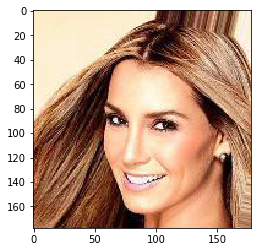

In [7]:
plt.imshow(img)

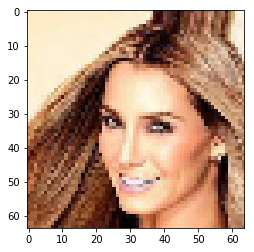

In [8]:
rsz = imresize(img, (64,64))
plt.imshow(rsz)

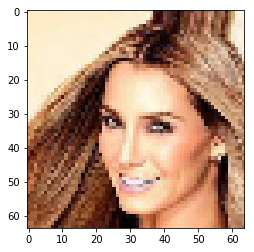

In [9]:
plt.imshow(rsz, interpolation='nearest')

(64, 64)


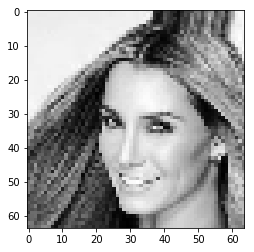

In [10]:
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

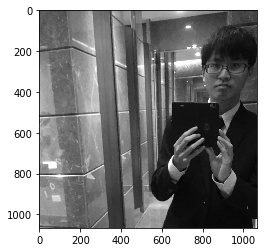

In [11]:
img = plt.imread(files[10])
img_mean = np.mean(img, axis = 2)
plt.imshow(img_mean, cmap='gray')